# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from pathlib import Path
import plotly.express as px

# Import Data

In [2]:
input_dir = Path('bin/fund_clustering')

In [14]:
price_df = pd.read_csv(input_dir / 'price.csv', index_col='date')
price_df.columns = price_df.columns.astype(int)
price_df

0         1         2         3         4   \
date                                                                          
2012-01-05 00:00:00+00:00  1.000180  1.011384  1.000000  0.996344  0.999229   
2012-01-06 00:00:00+00:00  1.000316  1.007956  1.000000  0.995750  0.998490   
2012-01-07 00:00:00+00:00  1.000316  1.007956  1.000000  0.995750  0.998490   
2012-01-08 00:00:00+00:00  1.000316  1.007956  1.000000  0.995750  0.998490   
2012-01-09 00:00:00+00:00  1.000636  1.025492  1.000000  1.002856  1.005694   
...                             ...       ...       ...       ...       ...   
2022-06-06 00:00:00+00:00  1.174306  1.509870  2.044831  2.490468  1.567388   
2022-06-07 00:00:00+00:00  1.173956  1.531095  2.055218  2.490783  1.554793   
2022-06-08 00:00:00+00:00  1.173967  1.557711  2.074219  2.493613  1.559102   
2022-06-09 00:00:00+00:00  1.173858  1.543977  2.070984  2.498457  1.568515   
2022-06-10 00:00:00+00:00  1.173738  1.546261  2.070984  2.490069  1.559498   

                                 5         6         7         8         9   \
date                                                                          
2012-01-05 00:00:00+00:00  1.000307  1.009507  1.002404  0.999012  0.997317   
2012-01-06 00:00:00+00:00  0.999232  0.994756  0.993966  0.997289  1.000457   
2012-01-07 00:00:00+00:00  0.999232  0.994756  0.993966  0.997289  1.000457   
2012-01-08 00:00:00+00:00  0.999232  0.994756  0.993966  0.997289  1.000457   
2012-01-09 00:00:00+00:00  1.005577  1.014423  1.013770  0.997930  1.001391   
...                             ...       ...       ...       ...       ...   
2022-06-06 00:00:00+00:00  2.100095  0.837987  1.222016  0.637443  0.990003   
2022-06-07 00:00:00+00:00  2.084978  0.836718  1.236994  0.640237  0.990154   
2022-06-08 00:00:00+00:00  2.091677  0.860139  1.263583  0.638984  0.989696   
2022-06-09 00:00:00+00:00  2.100105  0.853988  1.257460  0.634812  0.989132   
2022-06-10 00:00:00+00:00  2.087031  0.856949  1.257460  0.634589  0.989134   

                           ...        58        59        60        61  \
date                       ...                                           
2012-01-05 00:00:00+00:00  ...  1.001922  1.000536  0.999909  0.998713   
2012-01-06 00:00:00+00:00  ...  0.998406  1.003426  1.000543  0.997784   
2012-01-07 00:00:00+00:00  ...  0.998406  1.003426  1.000543  0.997784   
2012-01-08 00:00:00+00:00  ...  0.998406  1.003426  1.000543  0.997784   
2012-01-09 00:00:00+00:00  ...  0.998328  1.006334  1.004588  0.998188   
...                        ...       ...       ...       ...       ...   
2022-06-06 00:00:00+00:00  ...  1.214670  1.109631  1.911073  1.144658   
2022-06-07 00:00:00+00:00  ...  1.206887  1.109163  1.898427  1.144576   
2022-06-08 00:00:00+00:00  ...  1.207769  1.109207  1.904807  1.142276   
2022-06-09 00:00:00+00:00  ...  1.201656  1.109108  1.914050  1.140850   
2022-06-10 00:00:00+00:00  ...  1.201656  1.106816  1.906992  1.140850   

                                 62        63        64        65        66  \
date                                                                          
2012-01-05 00:00:00+00:00  0.998904  1.002557  0.995575  1.000201  1.000938   
2012-01-06 00:00:00+00:00  0.996557  0.993529  0.994119  1.000595  0.999870   
2012-01-07 00:00:00+00:00  0.996557  0.993529  0.994119  1.000595  0.999870   
2012-01-08 00:00:00+00:00  0.996557  0.993529  0.994119  1.000595  0.999870   
2012-01-09 00:00:00+00:00  1.004572  1.001035  0.993912  1.000822  1.009826   
...                             ...       ...       ...       ...       ...   
2022-06-06 00:00:00+00:00  0.619439  1.423145  1.995840  2.632143  1.759520   
2022-06-07 00:00:00+00:00  0.619443  1.421937  1.994941  2.613016  1.746426   
2022-06-08 00:00:00+00:00  0.619653  1.422622  1.994222  2.621814  1.751210   
2022-06-09 00:00:00+00:00  0.620021  1.402800  1.983767  2.633995  1.759758   
2022-06-10 00:00:00+00:00  0.619726  1.402800  1.983767  2.615283 

In [4]:
fund_df = pd.read_csv(input_dir / 'fund.csv')
fund_df.head()

fund_id short_code                              name_th  \
0  F000000QSX      TMB50              กองทุนเปิดทหารไทย SET50   
1  F000000QU8        ABG            กองทุนเปิด อเบอร์ดีน โกรท   
2  F000000QU9      ABLTF     กองทุนเปิด อเบอร์ดีน หุ้นระยะยาว   
3  F000000QWJ       ABSL  กองทุนเปิด อเบอร์ดีน สยาม ลีดเดอร์ส   
4  F000000QWL        ABV            กองทุนเปิด อเบอร์ดีน แวลู   

  aimc_category_id                                         short_desc  \
0       LC00002660  เป็นกองทุน Index Fund จุดประสงค์เพื่อลงทุนเลีย...   
1       LC00002470                                                NaN   
2       LC00002470                                                NaN   
3       LC00002470                                                NaN   
4       LC00002490                                                NaN   

   is_finnomena_pick  is_in_trending  sec_is_active aimc_broad_category_id  \
0              False           False           True             LC00002500   
1              False           False           True             LC00002500   
2              False           False           True             LC00002500   
3               True           False           True             LC00002500   
4              False           False           True             LC00002464   

  aimc_broad_category_name_en  ... real_back_end_fee real_front_end_fee  \
0                      Equity  ...              0.00                0.0   
1                      Equity  ...              1.00                0.0   
2                      Equity  ...              1.00                0.0   
3                      Equity  ...              0.25                0.5   
4                  Allocation  ...              0.25                0.5   

  real_management_fee  risk_level           risk_spectrum sec_cancel_date  \
0              1.0000         6.0  6 - กองทุนรวมตราสารทุน               -   
1              1.8725         6.0  6 - กองทุนรวมตราสารทุน               -   
2              1.8725         6.0  6 - กองทุนรวมตราสารทุน               -   
3              1.8725         6.0  6 - กองทุนรวมตราสารทุน               -   
4              1.0700         5.0        5 - กองทุนรวมผสม               -   

  sec_fund_status tax_saving_fund                  open_date  cluster_id  
0              RG             NaN  2001-03-29 00:00:00+00:00          34  
1              RG             NaN  1997-07-18 00:00:00+00:00          24  
2              RG             LTF  2004-10-28 00:00:00+00:00          24  
3              RG             NaN  2004-03-02 00:00:00+00:00          24  
4              RG             NaN  2003-11-13 00:00:00+00:00          44  

[5 rows x 45 columns]

In [5]:
cluster_id_mapper = pd.read_csv(input_dir / 'cluster_id_table.csv', index_col='cluster_id').squeeze()
cluster_id_mapper = cluster_id_mapper.str.split('|')
cluster_id_mapper

cluster_id
-1     [I-Emerging 10S2, KWI ASIAN SM, T-LowBeta, SCB...
 0     [ABSI-RMF, K-TREASURY, CPRMF5, CPRMF4, CPRMF3,...
 1     [KWI DRAGON, ABCG, K-CHX, KT-CHINA-A, KT-CHINA...
 2                        [ASP-NGF, T-JapanEQ, TMBJPNAE]
 3                     [ABSM, KFTHAISM, UGEAR, SCBGEARA]
                             ...                        
 63    [TMBEMEQ, UOBSA, ABGEM, SCBKEQTG, SCBKEQTGP, S...
 64    [ABWOOF, ABEG, I-CHIC, T-MAP, T-GlobalEQ, KF-E...
 65                                             [KFSMUL]
 66    [ERMF, ONE-G, PRINCIPAL EQRMF, BKIND, T-Mixed7...
 67            [TFIF, UOBSVRMF, TFixed3Y11M1AI, TFIFPVD]
Name: short_code, Length: 69, dtype: object

# Portfolio Allocation


## Generate Weights

In [6]:
n_cluster = len(price_df.columns)


In [7]:
MAX_NUMBER_FUND = 8
N_SCENARIO = 100 * n_cluster * MAX_NUMBER_FUND
N_SCENARIO

54400

In [16]:
cluster_ids = price_df.columns.to_series()
cluster_ids

0      0
1      1
2      2
3      3
4      4
      ..
63    63
64    64
65    65
66    66
67    67
Length: 68, dtype: int64

In [17]:

scenarios = np.zeros((N_SCENARIO, len(price_df.columns)), dtype=np.float64)

for scenario_index in tqdm.tqdm(range(N_SCENARIO)):
    
    selected_cluster_indexes = np.random.choice(cluster_ids, size=MAX_NUMBER_FUND, replace=False)
    weights = np.random.uniform(size=MAX_NUMBER_FUND)
    weights = weights / weights.sum()
    
    scenarios[scenario_index, selected_cluster_indexes] = weights

100%|██████████| 54400/54400 [00:02<00:00, 19219.48it/s]


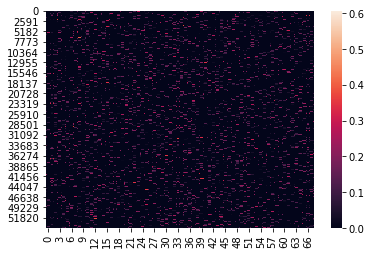

In [18]:
sns.heatmap(scenarios)

## Generate Portfolios

In [19]:
portfolio_df = (price_df @ scenarios.T)
portfolio_df

0         1         2         3         4      \
date                                                                          
2012-01-05 00:00:00+00:00  1.002487  0.997653  0.999799  0.999948  1.002581   
2012-01-06 00:00:00+00:00  0.999819  0.996924  0.998266  0.998026  0.999937   
2012-01-07 00:00:00+00:00  0.999819  0.996924  0.998266  0.998026  0.999937   
2012-01-08 00:00:00+00:00  0.999819  0.996924  0.998266  0.998026  0.999937   
2012-01-09 00:00:00+00:00  1.004170  1.004269  1.006677  1.005308  1.006704   
...                             ...       ...       ...       ...       ...   
2022-06-06 00:00:00+00:00  0.963425  1.535939  1.603371  1.078300  1.684327   
2022-06-07 00:00:00+00:00  0.964376  1.532065  1.597372  1.077250  1.676577   
2022-06-08 00:00:00+00:00  0.970168  1.540836  1.603506  1.081667  1.680300   
2022-06-09 00:00:00+00:00  0.967323  1.538768  1.601064  1.075476  1.675565   
2022-06-10 00:00:00+00:00  0.967717  1.534146  1.597196  1.074477  1.672523   

                              5         6         7         8         9      \
date                                                                          
2012-01-05 00:00:00+00:00  1.000009  0.998963  0.997039  0.998319  1.000536   
2012-01-06 00:00:00+00:00  1.001614  0.998571  0.997883  0.997182  1.000166   
2012-01-07 00:00:00+00:00  1.001614  0.998571  0.997883  0.997182  1.000166   
2012-01-08 00:00:00+00:00  1.001614  0.998571  0.997883  0.997182  1.000166   
2012-01-09 00:00:00+00:00  1.004530  1.003331  1.002343  1.004669  1.003742   
...                             ...       ...       ...       ...       ...   
2022-06-06 00:00:00+00:00  1.218041  1.349850  1.362813  1.492127  1.238530   
2022-06-07 00:00:00+00:00  1.218440  1.345718  1.363682  1.489426  1.235243   
2022-06-08 00:00:00+00:00  1.219369  1.352614  1.369583  1.494296  1.238066   
2022-06-09 00:00:00+00:00  1.214604  1.350509  1.364643  1.486224  1.236934   
2022-06-10 00:00:00+00:00  1.214087  1.348071  1.363946  1.482608  1.234271   

                           ...     54390     54391     54392     54393  \
date                       ...                                           
2012-01-05 00:00:00+00:00  ...  1.001362  1.001155  0.999662  0.999769   
2012-01-06 00:00:00+00:00  ...  0.999402  0.999071  0.998405  0.999191   
2012-01-07 00:00:00+00:00  ...  0.999402  0.999071  0.998405  0.999191   
2012-01-08 00:00:00+00:00  ...  0.999402  0.999071  0.998405  0.999191   
2012-01-09 00:00:00+00:00  ...  1.006643  1.002039  1.005331  1.005707   
...                        ...       ...       ...       ...       ...   
2022-06-06 00:00:00+00:00  ...  1.613920  1.774346  1.580268  1.378773   
2022-06-07 00:00:00+00:00  ...  1.605994  1.774370  1.574746  1.376100   
2022-06-08 00:00:00+00:00  ...  1.611724  1.783193  1.579946  1.379491   
2022-06-09 00:00:00+00:00  ...  1.614241  1.779678  1.577216  1.376683   
2022-06-10 00:00:00+00:00  ...  1.609478  1.778014  1.576207  1.373447   

                              54394     54395     54396     54397     54398  \
date                                                                          
2012-01-05 00:00:00+00:00  0.995533  0.997175  0.999567  0.997256  1.000781   
2012-01-06 00:00:00+00:00  0.995350  0.999327  0.999236  0.996180  0.998858   
2012-01-07 00:00:00+00:00  0.995350  0.999327  0.999236  0.996180  0.998858   
2012-01-08 00:00:00+00:00  0.995350  0.999327  0.999236  0.996180  0.998858   
2012-01-09 00:00:00+00:00  1.002864  1.003416  1.005287  0.999954  1.006725   
...                             ...       ...       ...       ...       ...   
2022-06-06 00:00:00+00:00  2.010986  1.519217  1.336561  1.337654  1.657710   
2022-06-07 00:00:00+00:00  2.008586  1.527536  1.339381  1.336807  1.670415   
2022-06-08 00:00:00+00:00  2.008989  1.532707  1.346787  1.340824  1.674760   
2022-06-09 00:00:00+00:00  2.000527  1.525329  1.338292  1.333875  1.664127   
2022-06-10 00:00:00+00:00  1.995124  1.523636  1.337120  1.3324

## Efficient Frontier

In [20]:
NUM_DAY_PER_YEAR = 252
N_YEAR = len(portfolio_df.index) / NUM_DAY_PER_YEAR
N_YEAR

10.162698412698413

In [21]:
def annualize_return(prices):
    start_value = prices.iloc[0]
    last_value = prices.iloc[-1]
    total_return = 1 + (last_value - start_value) / start_value
    annualized_return = total_return ** (1 / N_YEAR)
    return annualized_return

def annualize_volatility(prices):
    returns = prices.pct_change()
    daily_volatility = returns.std()
    annualized_volatility = daily_volatility * np.sqrt(NUM_DAY_PER_YEAR)
    return annualized_volatility


In [22]:
mean_variance_df = pd.DataFrame(index=pd.Index(portfolio_df.columns, name='portfolio'))
mean_variance_df['annualized_return'] = portfolio_df.apply(annualize_return)
mean_variance_df['annualized_volatility'] = portfolio_df.apply(annualize_volatility)

In [23]:
mean_variance_df

annualized_return  annualized_volatility
portfolio                                          
0                   0.996533               0.072315
1                   1.043253               0.112876
2                   1.047174               0.092799
3                   1.007099               0.097579
4                   1.051646               0.087691
...                      ...                    ...
54395               1.042596               0.080586
54396               1.029043               0.092209
54397               1.028920               0.082359
54398               1.051313               0.113544
54399               1.041362               0.079346

[54400 rows x 2 columns]

In [24]:
px.scatter(mean_variance_df.reset_index(),
            x='annualized_volatility',
            y='annualized_return',
            hover_data=['portfolio'],
            title='Effient Frontier'
            )

# TODO

- Semi-deviation
- Stacked Line Chart for visualize diversification
- Compare Risk factor (volatility, down-side volatility, drawdown) to single fund
    - Is it worth ?